# Görüntünün Elde Edilmesi

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
xAx = np.array([0.19, 0.43, 0.15, 0.23, 0.31, 0.39, 0.47])

In [4]:
yAx = np.array([0.77, 0.77, 0.742, 0.737, 0.733, 0.737, 0.742])

In [5]:
colors = np.array(["green","lightblue", "red", "yellow", "blue", "brown", "orange"])

In [6]:
buyukluk = np.array([15000, 15000, 2000, 2000, 2000, 2000, 2000])

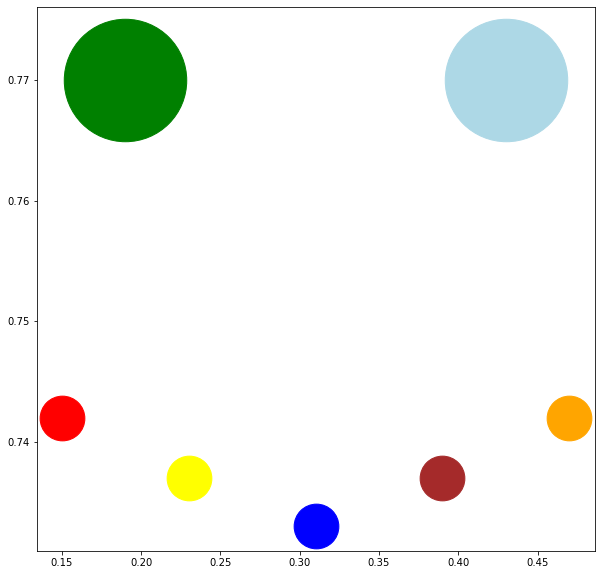

In [7]:
plt.figure(figsize = (10,10))
for i in range(0,7):
    plt.scatter(xAx[i], yAx[i], buyukluk[i], colors[i])
plt.scatter(0.31,0.774, 20, "white")

# Genetik Algoritma

In [8]:
import random

In [9]:
iterasyon = 10
crossoverOrani = 0.3
populasyonBuyuklugu = 5
genBuyuklugu = 7
mutasyonSayisi = 1
epok = 0

In [10]:
def gen_0_olustur():
    x = random.random()
    y = random.random()
    return [x, y]

In [11]:
def gen_1_olustur(gen0):
    x = random.uniform(gen0[0], 1)
    y = gen0[1]
    return [x, y]

In [12]:
def gen_2_olustur(gen0):
    x = random.uniform(0, gen0[0])
    y = random.uniform(gen0[1], 0)
    return [x, y]

In [13]:
def gen_6_olustur(gen1, gen2):
    x = random.uniform(gen1[0], 1)
    y = gen2[1]
    return [x, y]

In [14]:
def gen_3_olustur(gen2, ortaNokta):
    x = random.uniform(gen2[0], ortaNokta)
    y = random.uniform(gen2[1], 0)
    return [x, y]

In [15]:
def gen_4_olustur(gen3, ortaNokta):
    x = ortaNokta
    y = random.uniform(gen3[1], 0)
    return [x, y]

In [16]:
def gen_5_olustur(gen3, gen6, ortaNokta):
    x = random.uniform(ortaNokta, gen6[0])
    y = gen3[1]
    return [x, y]

In [17]:
def fitnessYEkseni(gen0, gen1, gen2, gen3, gen4, gen5, gen6):
    fark1 = abs((gen0 - gen2) + (gen1 - gen6) - 2 * (yAx[0] - yAx[2]))
    fark2 = abs((gen2 - gen3) + (gen3 - gen4) + (gen5 - gen4) + (gen6 - gen5) - 4 * (yAx[2] - yAx[3]))
    return 1 / (1 + fark1 + fark2)

In [18]:
def fitnessXEkseni(gen0, gen1, gen2, gen3, gen4, gen5, gen6):
    fark1 = abs((gen3 - gen2) + (gen4 - gen3) + (gen5 - gen4) + (gen6 - gen5) - 4 * (xAx[4] - xAx[3]))
    fark2 = abs((gen2 - gen0) + (gen1 - gen6) - 2 * (xAx[2] - xAx[0]))
    fark3 = abs((gen1 - gen0) - (xAx[1] - xAx[0]))
    return 1 / (1 + fark1 + fark2 + fark3)

In [19]:
def olasilik(fitness):
    P = []
    total = sum(fitness)
    for f in fitness:
        P.append(f / total)
    return P

In [20]:
def populasyonOlustur():
    kromozom = [0,0,0,0,0,0,0]
    kromozom[0] = gen_0_olustur()
    kromozom[1] = gen_1_olustur(kromozom[0])
    kromozom[2] = gen_2_olustur(kromozom[0])
    ortaNokta = kromozom[0][0] + ((kromozom[1][0] - kromozom[0][0])/2)
    kromozom[6] = gen_6_olustur(kromozom[1], kromozom[2])
    kromozom[3] = gen_3_olustur(kromozom[2], ortaNokta)
    kromozom[4] = gen_4_olustur(kromozom[3], ortaNokta)
    kromozom[5] = gen_5_olustur(kromozom[3], kromozom[6], ortaNokta)
    return kromozom

In [21]:
def crossover(p1,p2):
    o1 = []
    o2 = []
    c = random.randint(1, genBuyuklugu - 1)
    o1[:c] = p2[:c]
    o1[c:] = p1[c:]
    
    o2[:c] = p1[:c]
    o2[c:] = p2[c:]
    return o1, o2

In [22]:
def mutasyon(mut):
    gecici = []
    gecici = mut[:]
    gen = random.random()
    index = random.randint(0, genBuyuklugu-1)
    gecici[index] = gen
    return gecici

In [23]:
kromozomlar = []
for i in range(populasyonBuyuklugu):
    kromozomlar.append(populasyonOlustur())
populasyonX = []
populasyonY = []
for i in range(populasyonBuyuklugu):
    geciciX = []
    geciciY = []
    for j in range(genBuyuklugu):
        geciciX.append(kromozomlar[i][j][0])
        geciciY.append(kromozomlar[i][j][1])
    populasyonX.append(geciciX)
    populasyonY.append(geciciY)

In [24]:
populasyonX

[[0.9835461349715968,
  0.9891628384884297,
  0.6069137238824149,
  0.8126418739838785,
  0.9863544867300132,
  0.9919852587753597,
  0.9974724443744515],
 [0.6143466511107755,
  0.8254563598436834,
  0.23268769592366598,
  0.44510045652044705,
  0.7199015054772294,
  0.7315043740438478,
  0.8516035699633031],
 [0.6041274274228797,
  0.927650452871638,
  0.20423499116433524,
  0.6600190503691434,
  0.7658889401472588,
  0.7989434845538702,
  0.9343191029083046],
 [0.3686290589734873,
  0.42158065344340123,
  0.25653404462626683,
  0.3306517056709814,
  0.39510485620844427,
  0.6610763109560097,
  0.7329280581256052],
 [0.5969710692711314,
  0.6890143906190476,
  0.10023750549065355,
  0.5410295403699801,
  0.6429927299450895,
  0.6656585838147354,
  0.6952121812648738]]

In [25]:
populasyonY

[[0.46870167808048446,
  0.46870167808048446,
  0.13981491982579286,
  0.08848672887274131,
  0.025023759288530886,
  0.08848672887274131,
  0.13981491982579286],
 [0.0003940612393823484,
  0.0003940612393823484,
  1.0924930228761905e-05,
  1.0560155122666317e-05,
  8.712170344231851e-06,
  1.0560155122666317e-05,
  1.0924930228761905e-05],
 [0.5383215550651947,
  0.5383215550651947,
  0.4748943686477848,
  0.27075740107455826,
  0.24075454626067444,
  0.27075740107455826,
  0.4748943686477848],
 [0.0669140306131415,
  0.0669140306131415,
  0.03110844219315772,
  0.024418185144848933,
  0.00849554748622729,
  0.024418185144848933,
  0.03110844219315772],
 [0.45893747548933084,
  0.45893747548933084,
  0.3438978490304448,
  0.18648790858131906,
  0.11164736183739603,
  0.18648790858131906,
  0.3438978490304448]]

In [26]:
fitnessX = []
fitnessY = []
for i in range(0, populasyonBuyuklugu):
    fitnessY.append(fitnessYEkseni(populasyonY[i][0], populasyonY[i][1], populasyonY[i][2], populasyonY[i][3], populasyonY[i][4], populasyonY[i][5], populasyonY[i][6]))
    fitnessX.append(fitnessXEkseni(populasyonX[i][0], populasyonX[i][1], populasyonX[i][2], populasyonX[i][3], populasyonX[i][4], populasyonX[i][5], populasyonX[i][6]))

rulet y:  [3, 4, 3, 0, 1]
rulet x:  [1, 3, 4, 4, 3]
cross y:  0
cross x:  1
Çaprazlamadan yeterli birey gelmedi X
Çaprazlamadan yeterli birey gelmedi Y
pop y:  5
pop x:  5
6
6
***  0 . iterasyon ***
rulet y:  [2, 4, 2, 4, 4]
rulet x:  [0, 3, 2, 0, 0]
cross y:  2
cross x:  0
Çaprazlamadan yeterli birey gelmedi X
pop y:  7
pop x:  5
6
6
***  1 . iterasyon ***
rulet y:  [0, 2, 1, 1, 0]
rulet x:  [1, 2, 2, 1, 0]
cross y:  1
cross x:  1
Çaprazlamadan yeterli birey gelmedi X
Çaprazlamadan yeterli birey gelmedi Y
pop y:  5
pop x:  5
6
6
***  2 . iterasyon ***
rulet y:  [4, 4, 3, 4, 1]
rulet x:  [2, 2, 4, 0, 0]
cross y:  2
cross x:  1
Çaprazlamadan yeterli birey gelmedi X
pop y:  7
pop x:  5
6
6
***  3 . iterasyon ***
rulet y:  [4, 0, 2, 1, 0]
rulet x:  [1, 2, 0, 0, 0]
cross y:  1
cross x:  2
Çaprazlamadan yeterli birey gelmedi Y
pop y:  5
pop x:  7
6
6
***  4 . iterasyon ***
rulet y:  [1, 4, 3, 3, 0]
rulet x:  [0, 3, 1, 4, 2]
cross y:  1
cross x:  0
Çaprazlamadan yeterli birey gelmedi X
Çapra

<ipython-input-27-6cf3fa590e02>:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,10))



Çaprazlamadan yeterli birey gelmedi Y
pop y:  5
pop x:  5
6
6
***  6 . iterasyon ***
rulet y:  [4, 4, 3, 4, 1]
rulet x:  [4, 1, 2, 1, 1]
cross y:  1
cross x:  1
Çaprazlamadan yeterli birey gelmedi X
Çaprazlamadan yeterli birey gelmedi Y
pop y:  5
pop x:  5
6
6
***  7 . iterasyon ***
rulet y:  [2, 0, 0, 3, 0]
rulet x:  [1, 2, 0, 1, 0]
cross y:  1
cross x:  0
Çaprazlamadan yeterli birey gelmedi X
Çaprazlamadan yeterli birey gelmedi Y
pop y:  5
pop x:  5
6
6
***  8 . iterasyon ***
rulet y:  [3, 2, 4, 4, 4]
rulet x:  [4, 0, 1, 1, 0]
cross y:  2
cross x:  2
pop y:  7
pop x:  7
8
8
***  9 . iterasyon ***


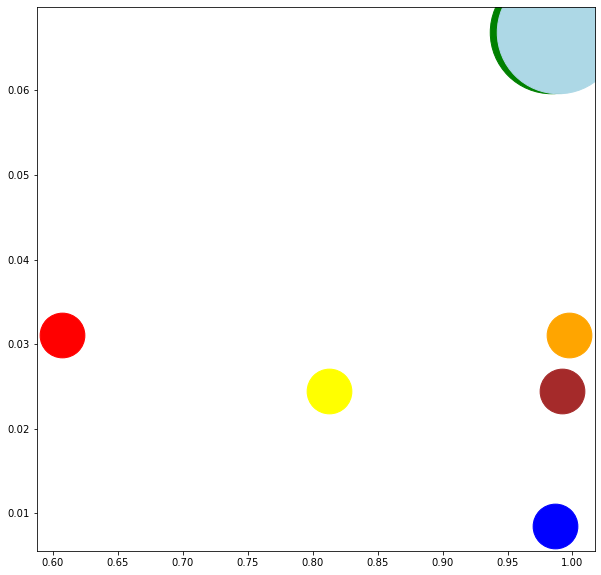

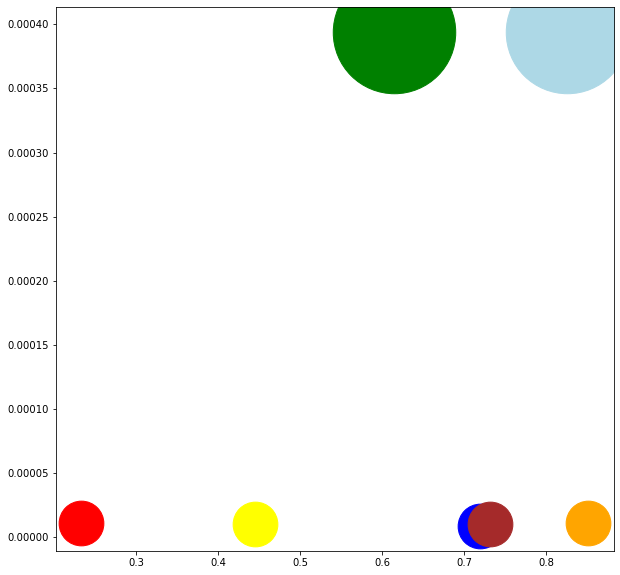

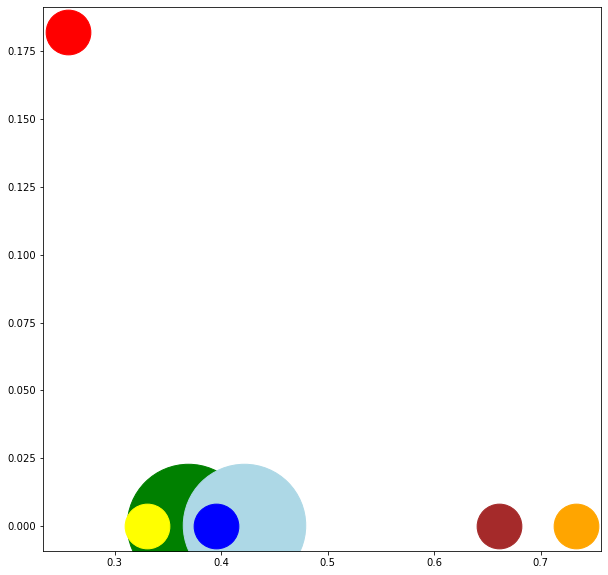

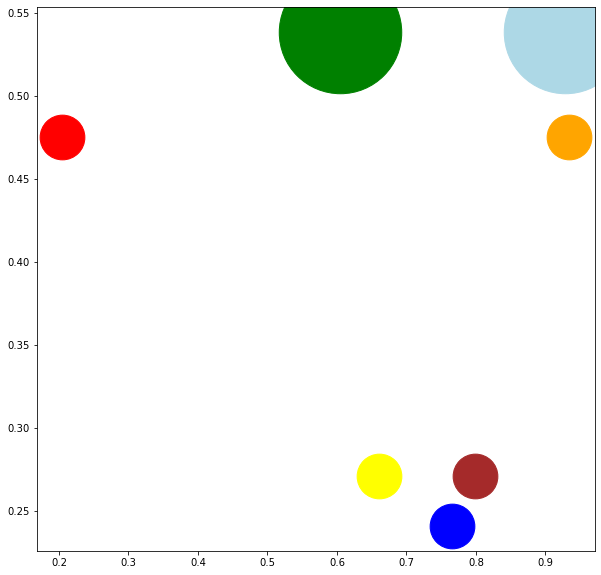

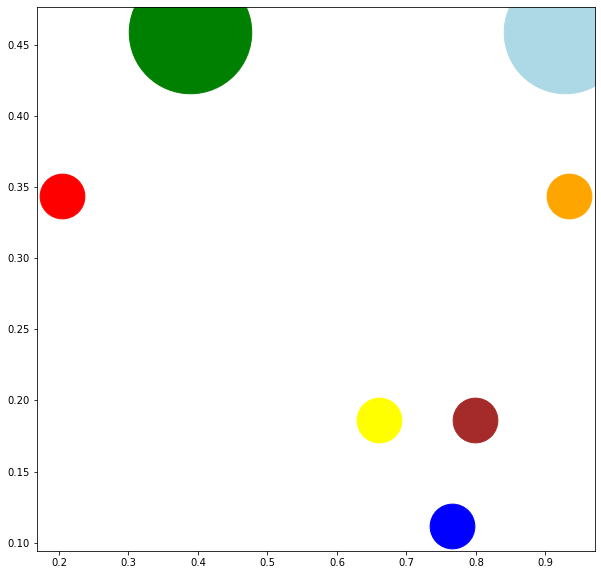

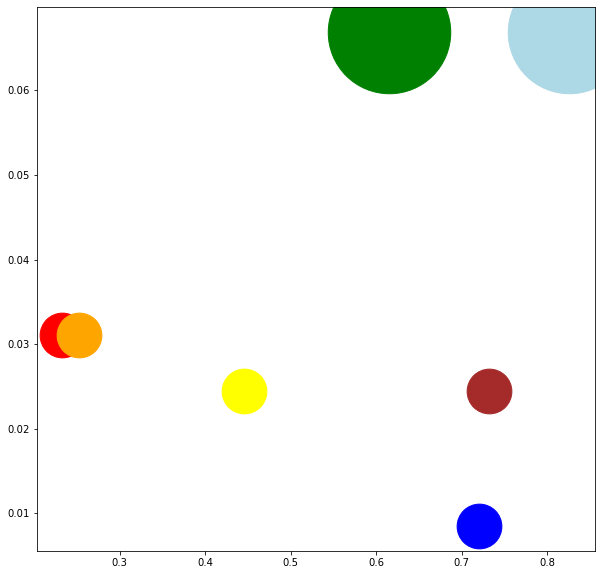

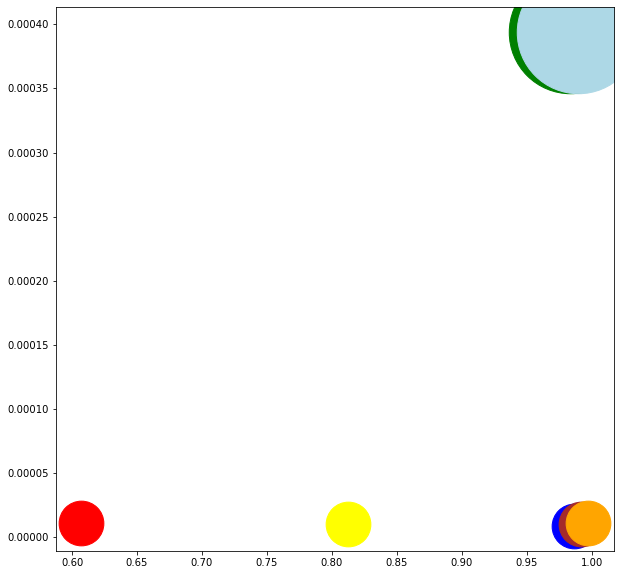

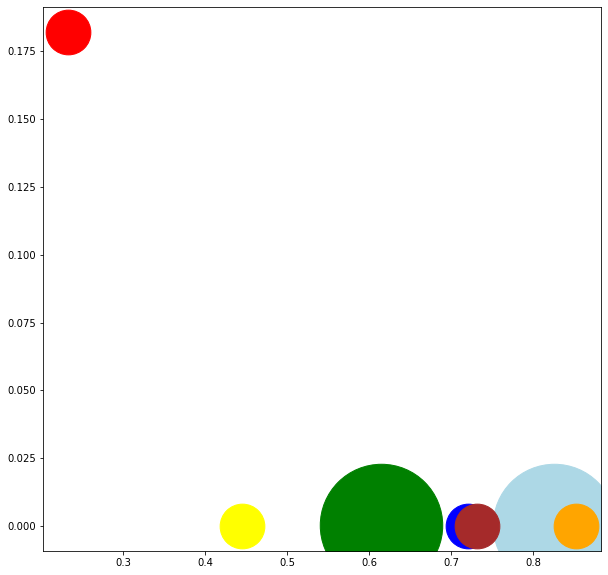

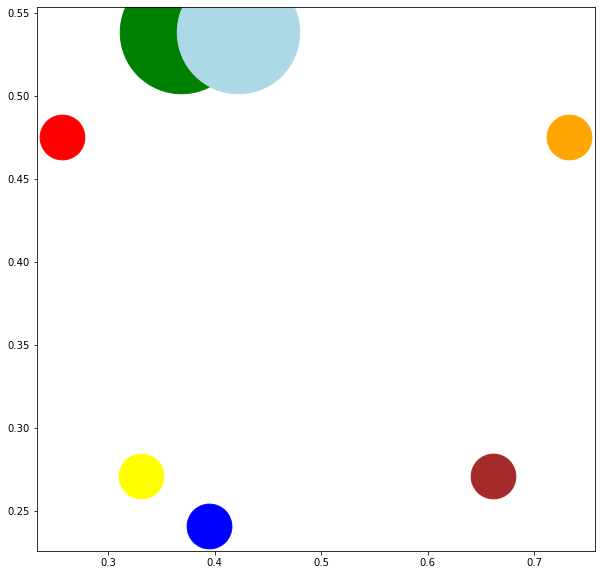

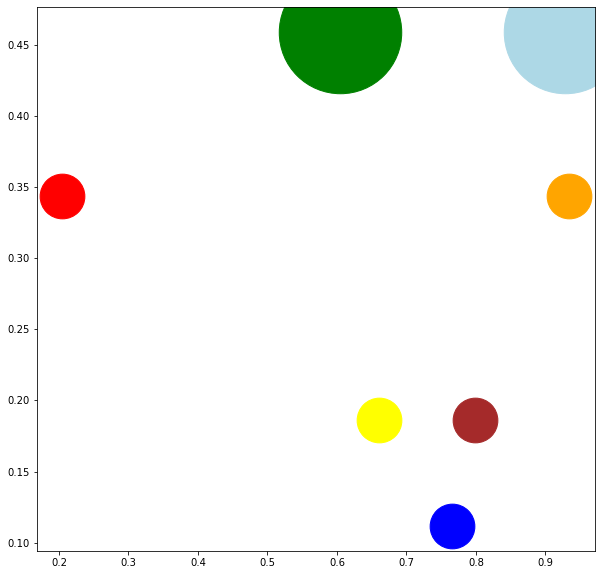

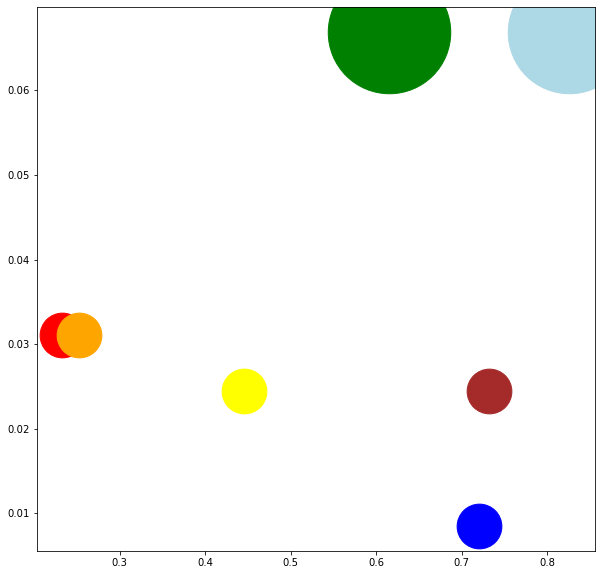

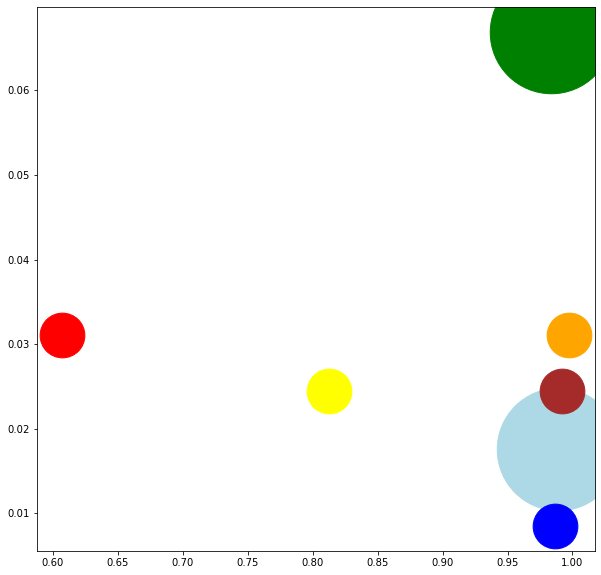

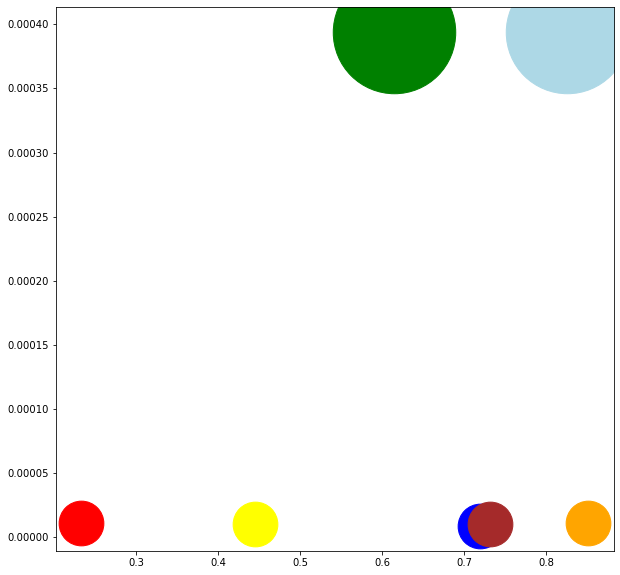

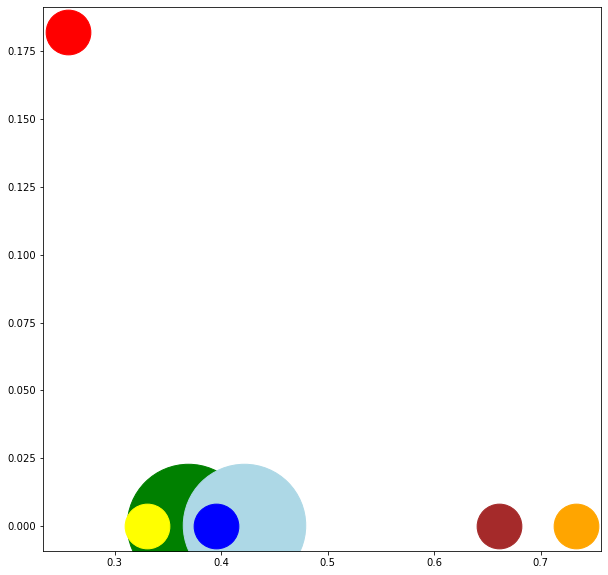

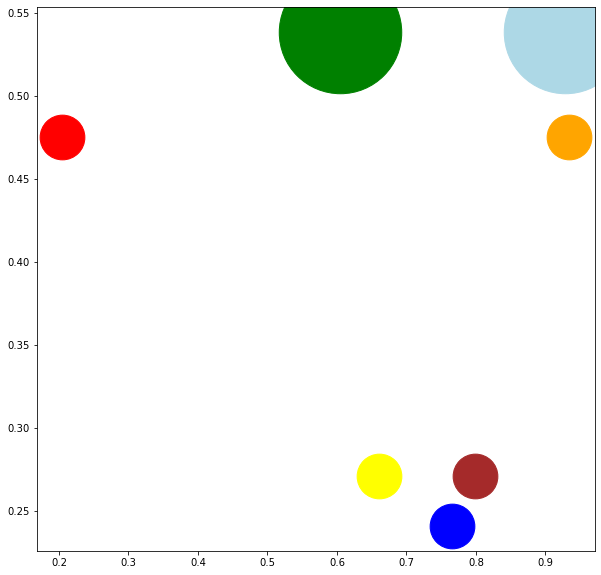

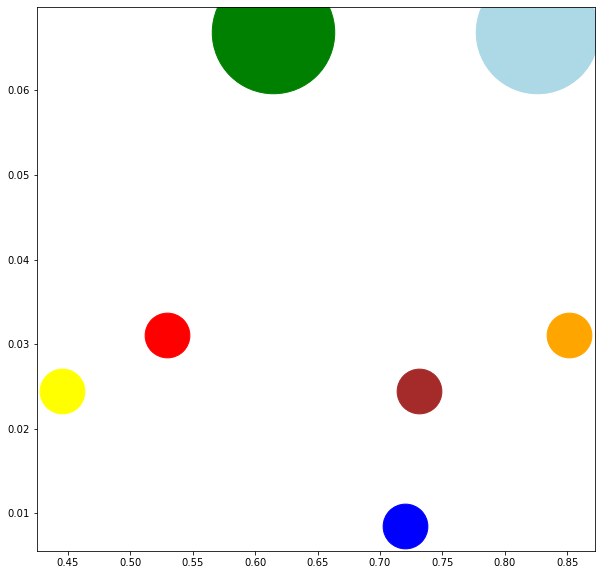

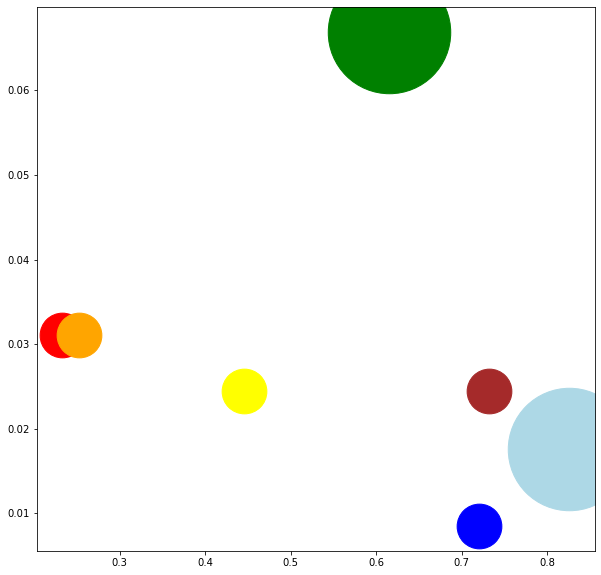

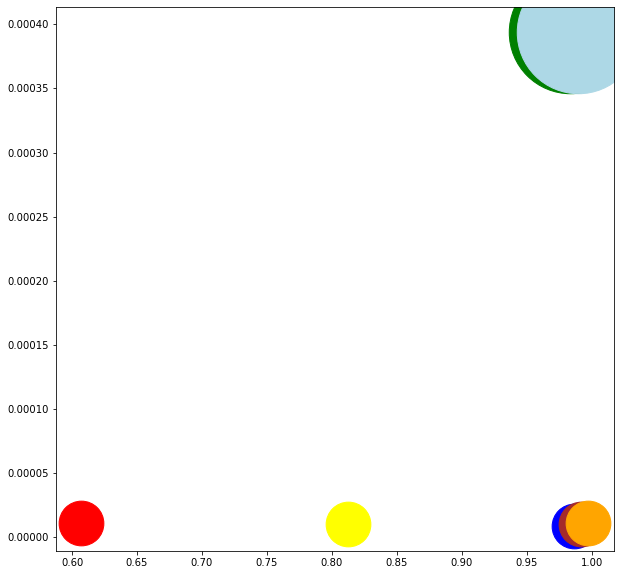

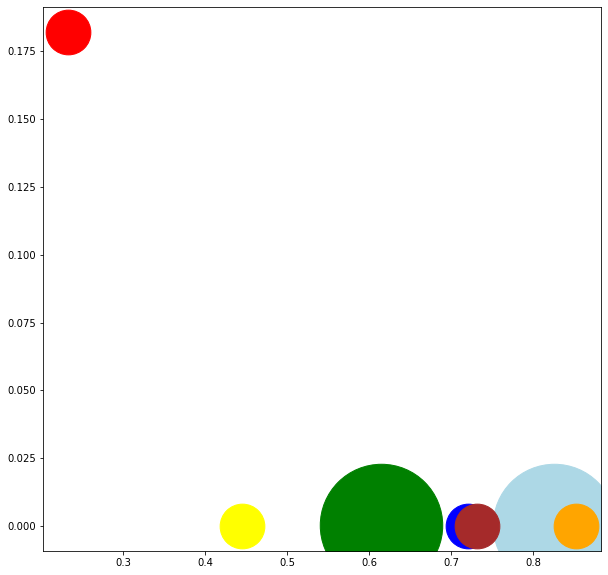

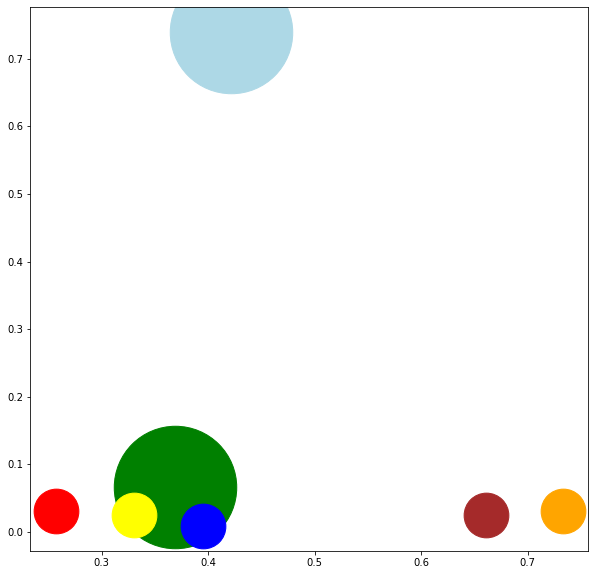

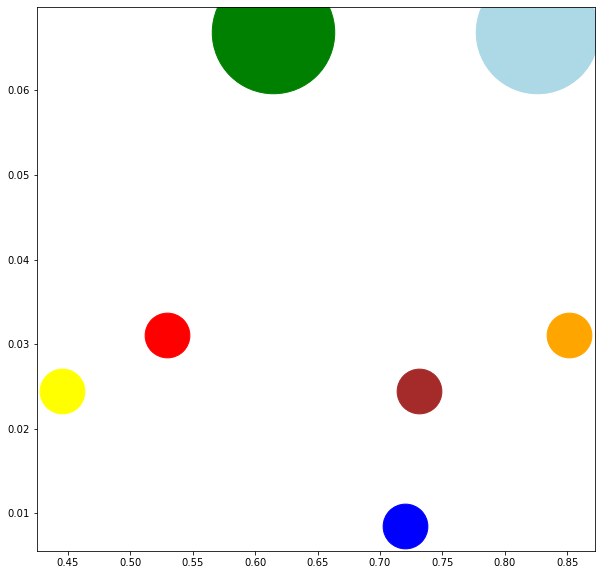

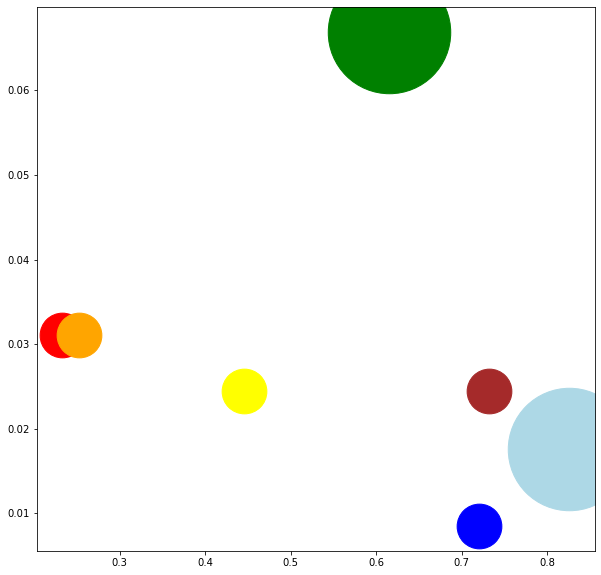

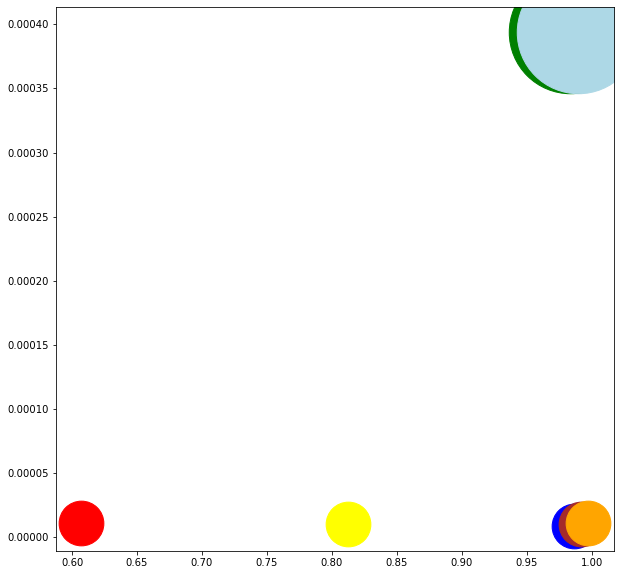

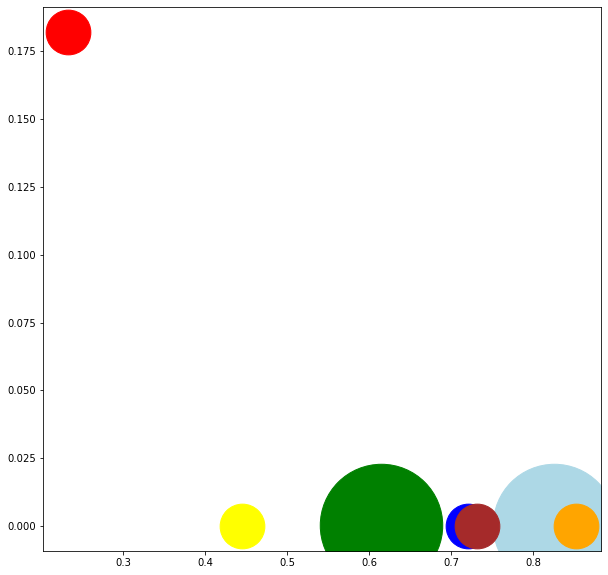

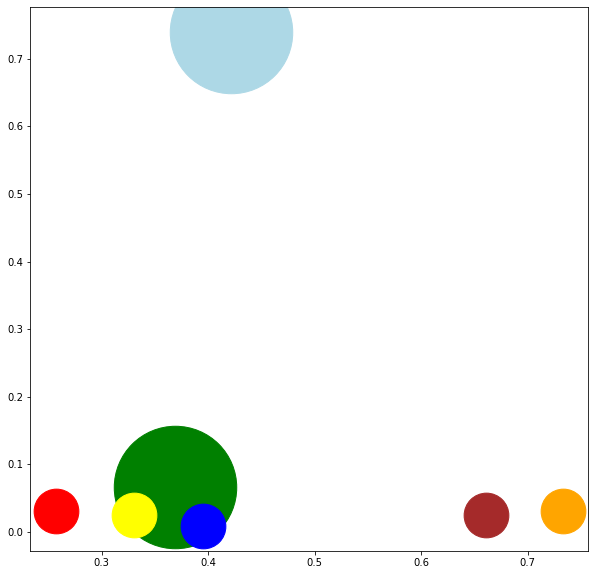

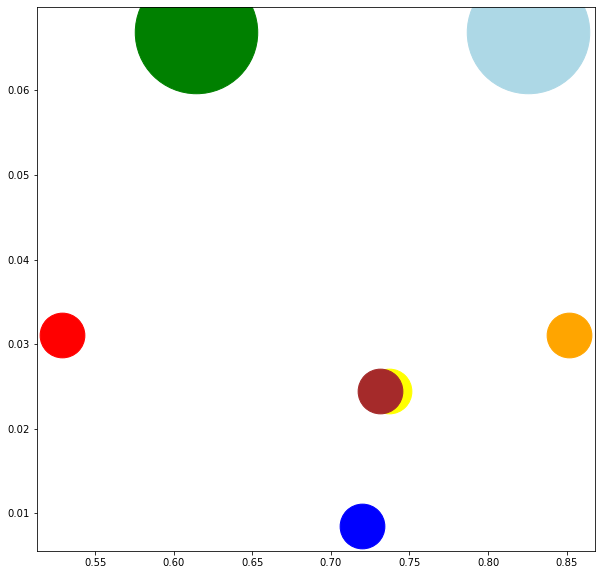

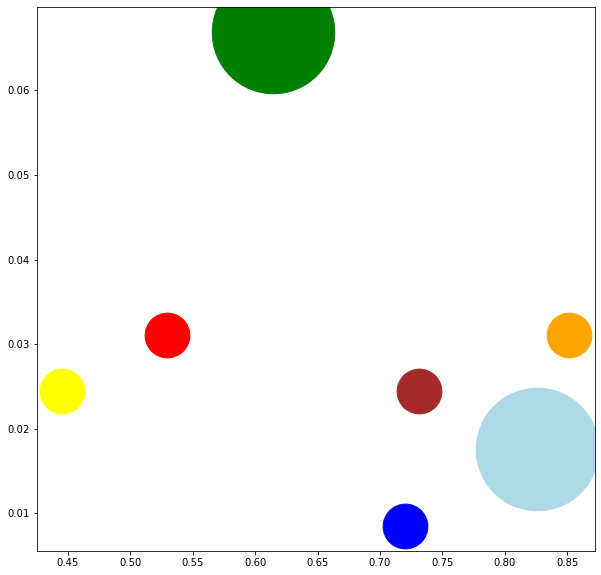

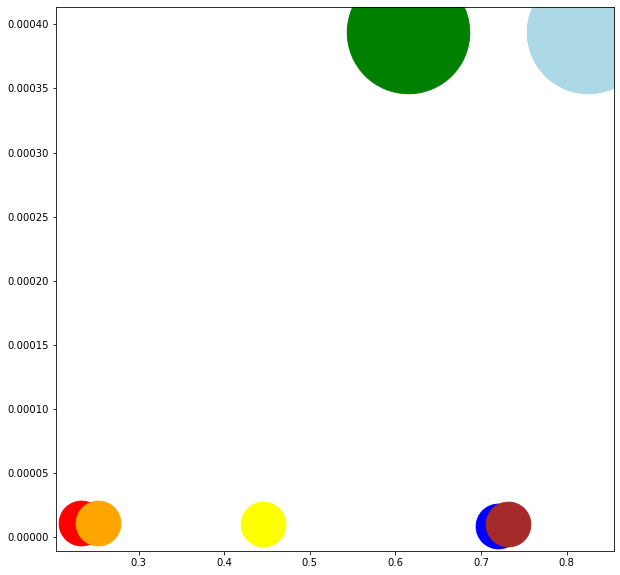

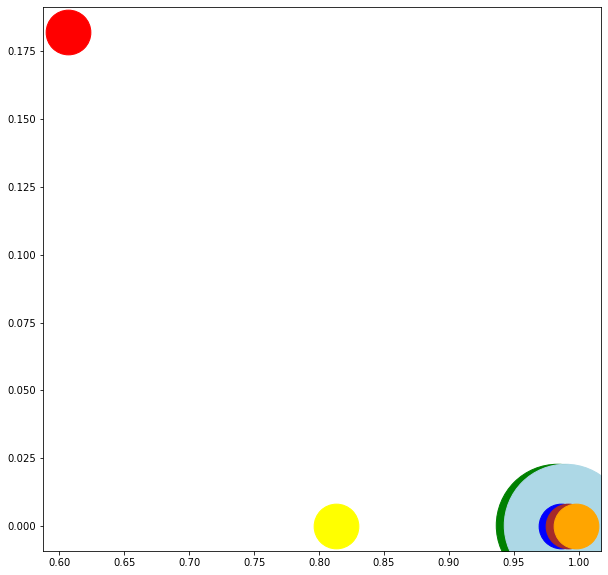

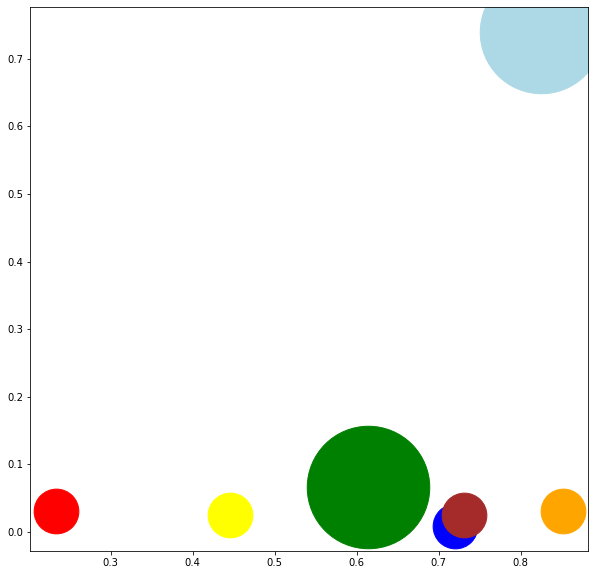

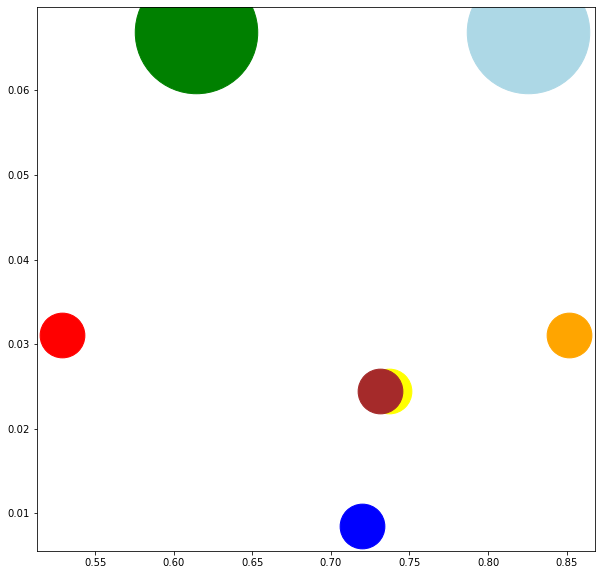

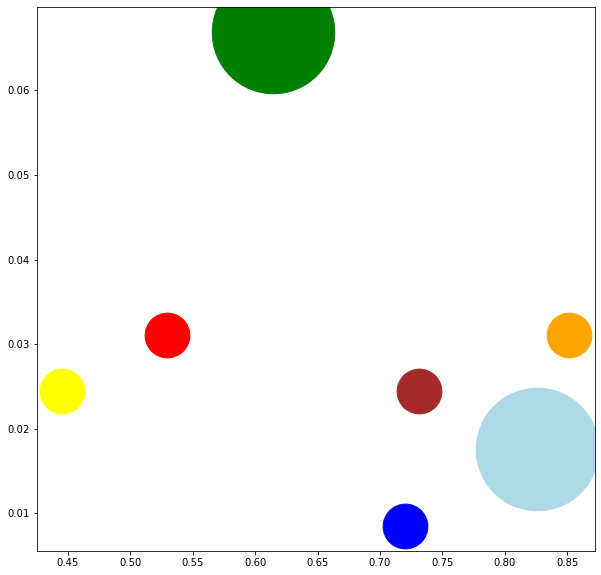

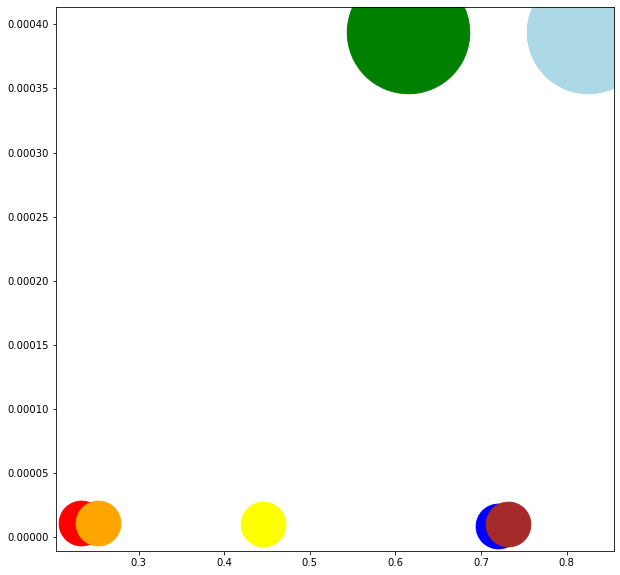

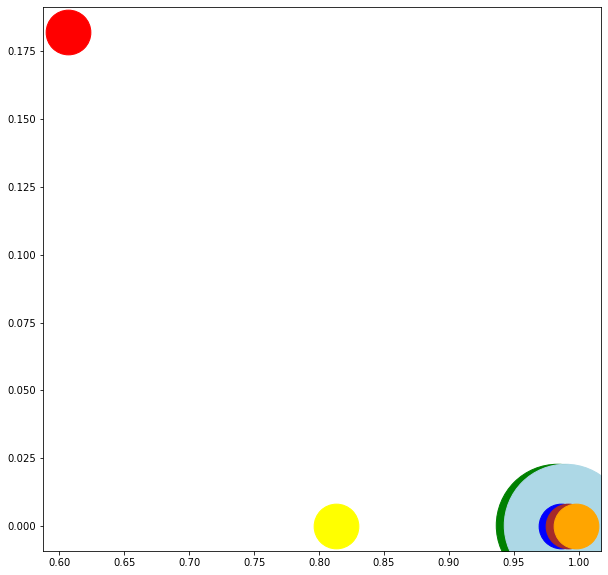

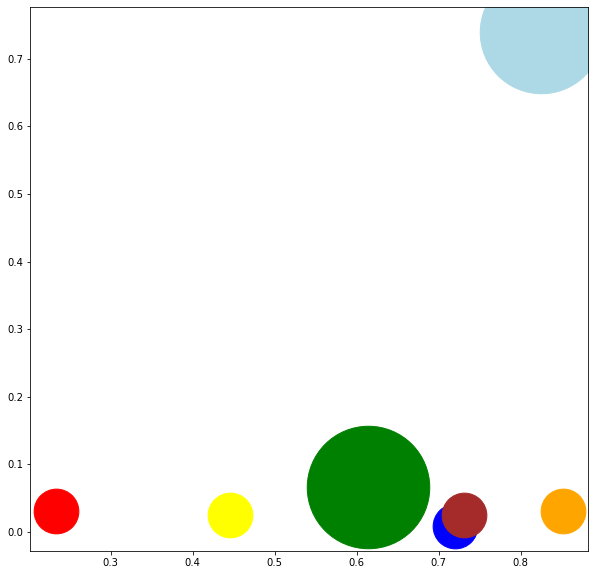

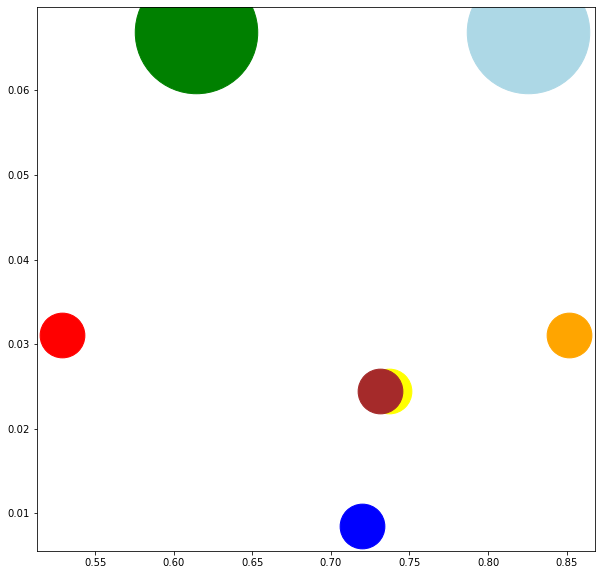

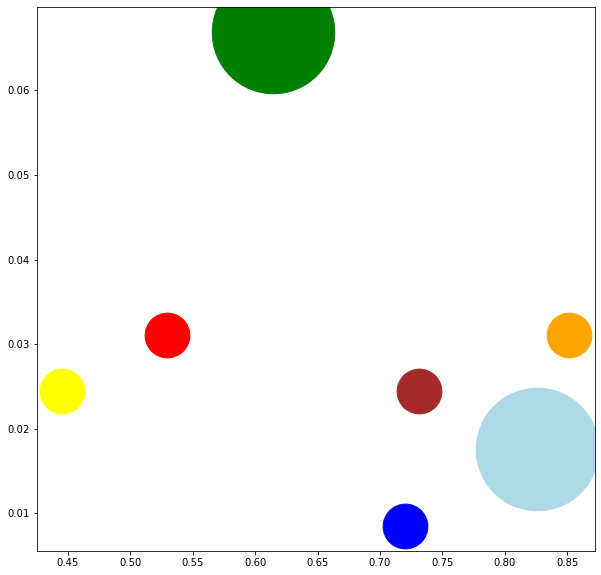

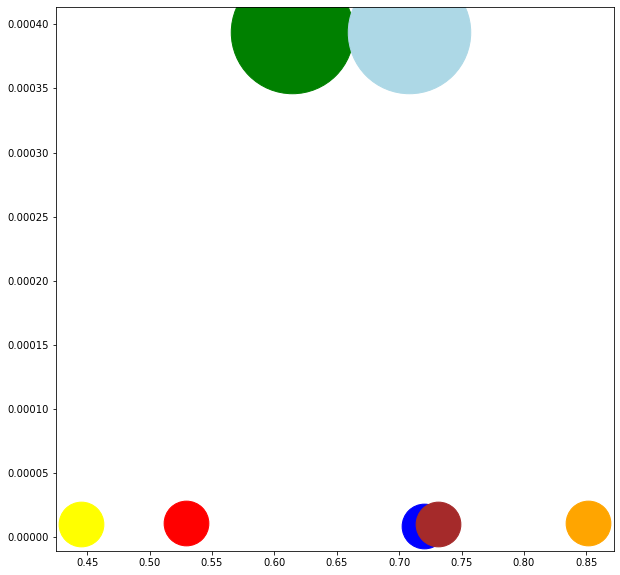

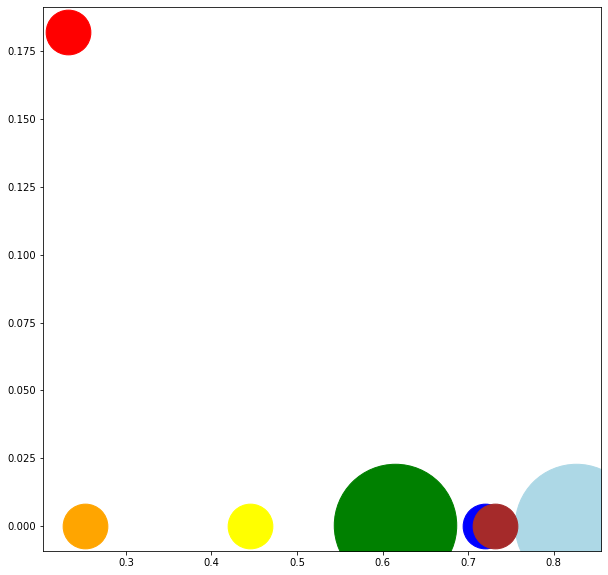

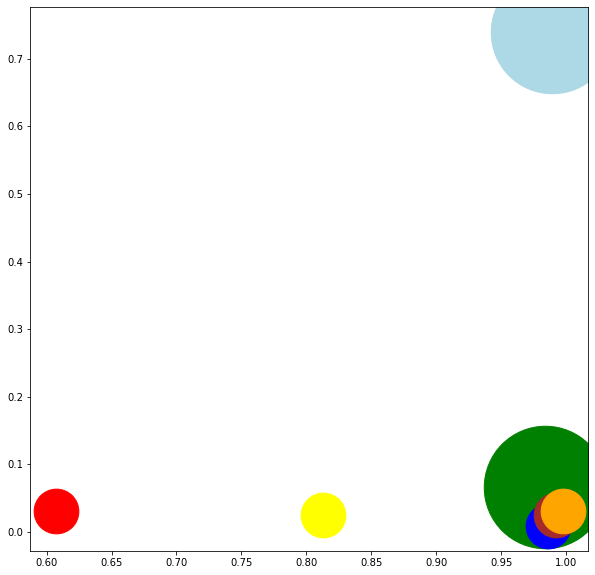

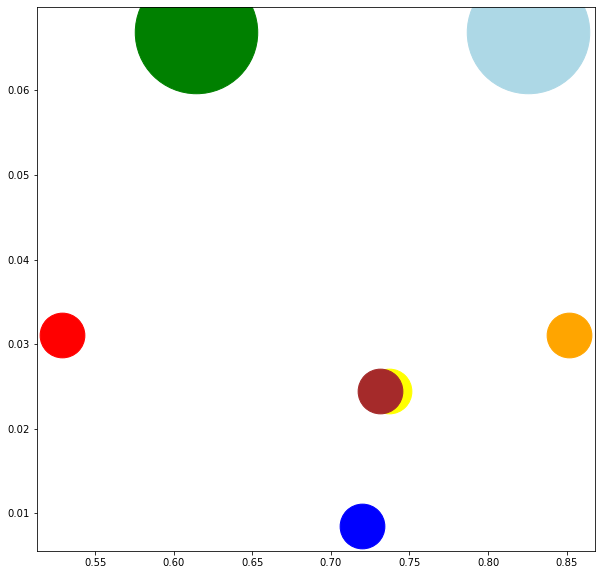

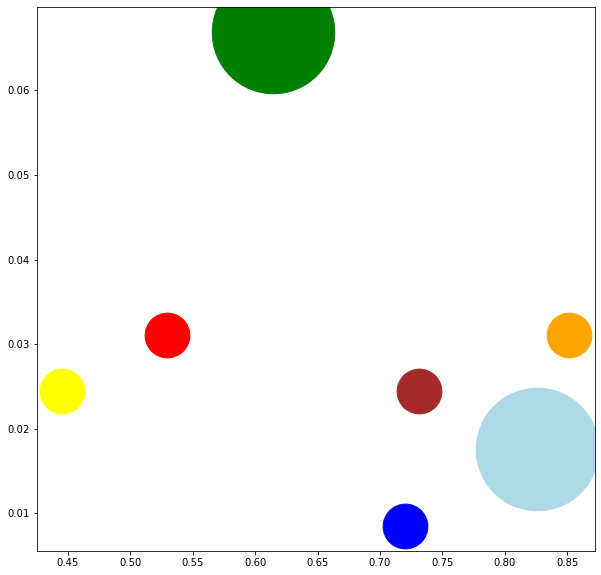

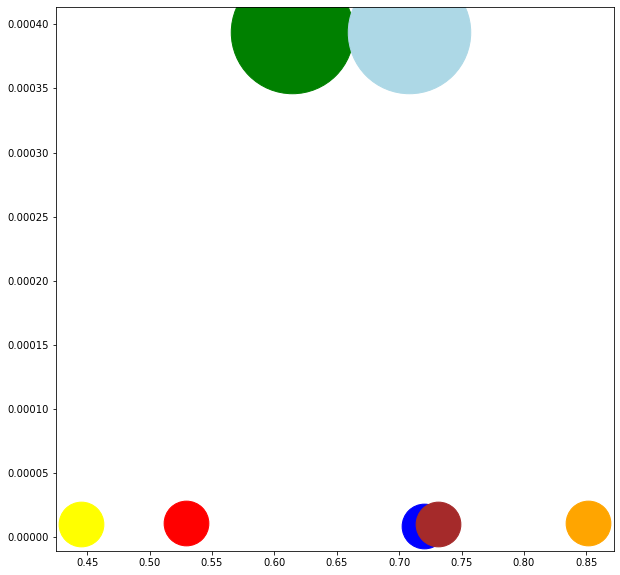

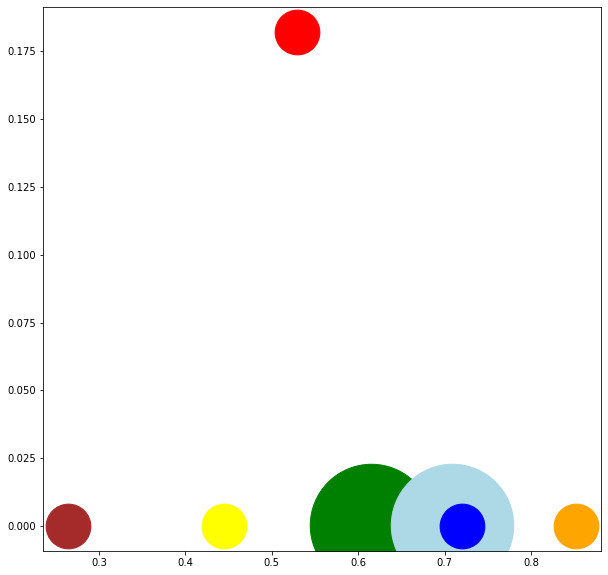

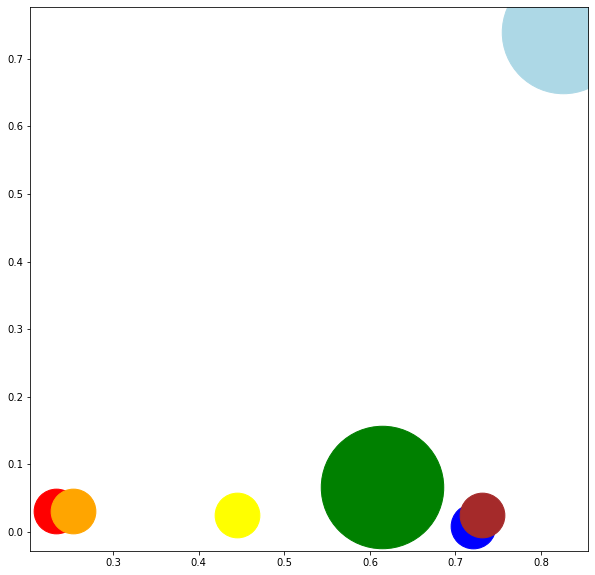

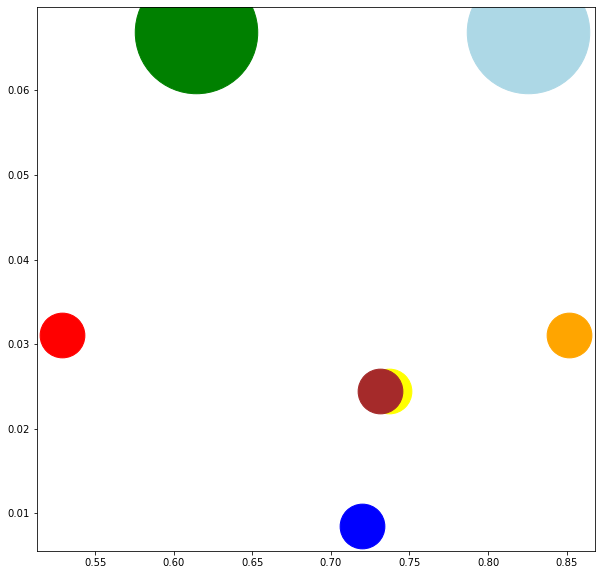

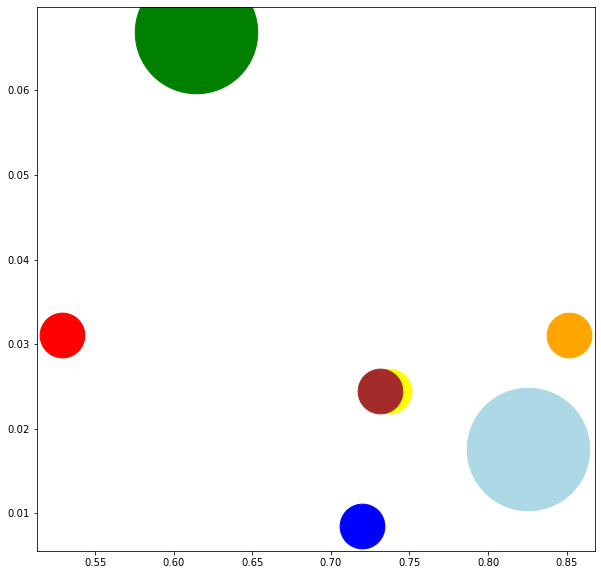

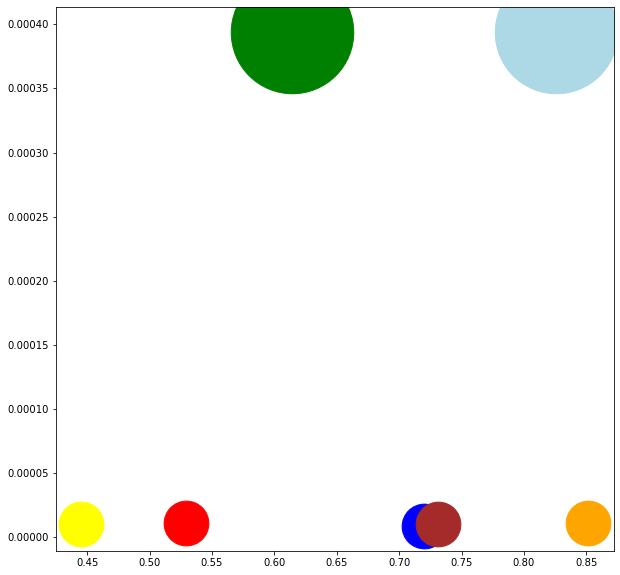

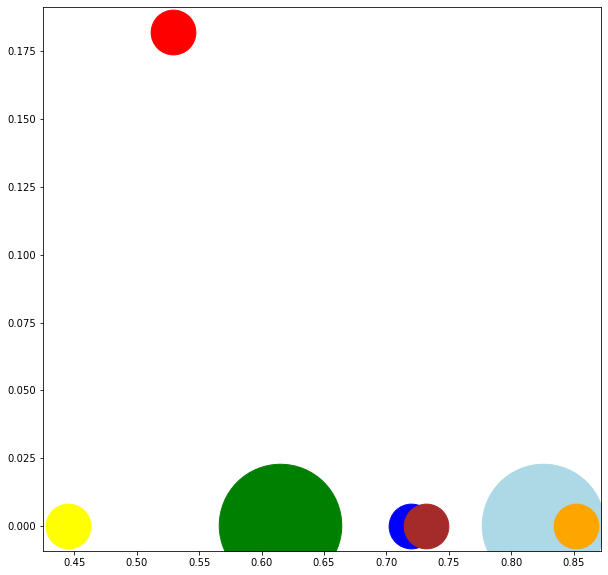

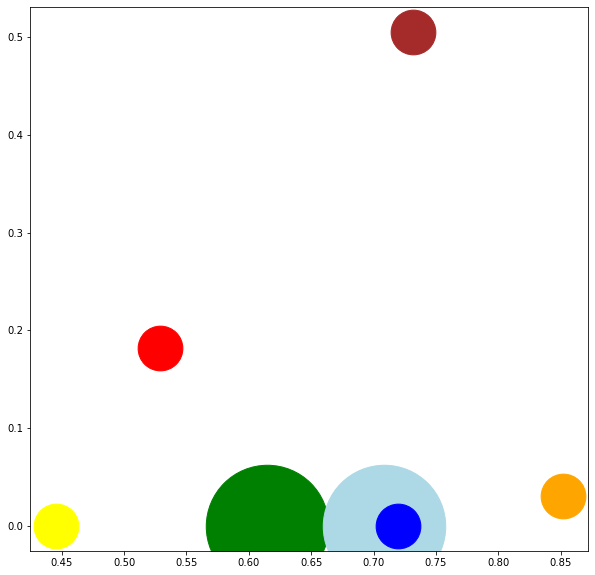

In [27]:
while(epok < iterasyon):
    pX = olasilik(fitnessX)
    pY = olasilik(fitnessY)
    cX = np.cumsum(pX)
    cY = np.cumsum(pY)

    ruletBireylerX = []
    ruletBireylerY = []
    for i in range(0, len(cX)):
        r = random.random()
        for j in range(0, len(cX)):
            if cX[j] > r:
                ruletBireylerX.append(j)
                break
    for i in range(0, len(cY)):
        a = random.random()
        for j in range(0, len(cY)):
            if cY[j] > a:
                ruletBireylerY.append(j)
                break
    print("rulet y: ",ruletBireylerY)
    print("rulet x: ",ruletBireylerX)
    crossoverBireylerX = []
    crossoverBireylerY = []
    k = 0
    while(k < populasyonBuyuklugu):
        r = random.random()
        #print(r)
        if(r < crossoverOrani):
            if(ruletBireylerX[k] not in crossoverBireylerX):
                crossoverBireylerX.append(ruletBireylerX[k])
        k += 1
    m = 0
    while(m < populasyonBuyuklugu):
        r = random.random()
        #print(r)
        if(r < crossoverOrani):
            if(ruletBireylerY[m] not in crossoverBireylerY):
                crossoverBireylerY.append(ruletBireylerY[m])
        m += 1
    print("cross y: ",len(crossoverBireylerY))
    print("cross x: ",len(crossoverBireylerX))
    if len(crossoverBireylerX) > 1:
        for i in range(0, len(crossoverBireylerX)):
            for j in range(i + 1, len(crossoverBireylerX)):
                o1, o2 = crossover(populasyonX[crossoverBireylerX[i]], populasyonX[crossoverBireylerX[j]])
                populasyonX.append(o1)
                populasyonX.append(o2)
                fitnessX.append(fitnessXEkseni(o1[0], o1[1], o1[2], o1[3], o1[4], o1[5], o1[6]))
                fitnessX.append(fitnessXEkseni(o2[0], o2[1], o2[2], o2[3], o2[4], o2[5], o2[6]))
    else:
        print("Çaprazlamadan yeterli birey gelmedi X")
    if len(crossoverBireylerY) > 1:
        for i in range(0, len(crossoverBireylerY)):
            for j in range(i + 1, len(crossoverBireylerY)):
                o1, o2 = crossover(populasyonY[crossoverBireylerY[i]], populasyonY[crossoverBireylerY[j]])
                populasyonY.append(o1)
                populasyonY.append(o2)
                fitnessY.append(fitnessYEkseni(o1[0], o1[1], o1[2], o1[3], o1[4], o1[5], o1[6]))
                fitnessY.append(fitnessYEkseni(o2[0], o2[1], o2[2], o2[3], o2[4], o2[5], o2[6]))
    else:
        print("Çaprazlamadan yeterli birey gelmedi Y")
    print("pop y: ",len(populasyonY))
    print("pop x: ",len(populasyonX))
    if len(populasyonX) > len(populasyonY):
        while (len(populasyonY) != len(populasyonX)):
            populasyonX.pop()
    elif len(populasyonX) < len(populasyonY):
        while (len(populasyonX) < len(populasyonY)):
            populasyonY.pop()
    for i in range(mutasyonSayisi):
        mutX = mutasyon(populasyonX[random.randint(0, len(populasyonX) - 1)])
        mutY = mutasyon(populasyonY[random.randint(0, len(populasyonY) - 1)])
        populasyonX.append(mutX)
        populasyonY.append(mutY)
        fitnessX.append(fitnessXEkseni(mutX[0], mutX[1], mutX[2], mutX[3], mutX[4], mutX[5], mutX[6]))
        fitnessY.append(fitnessYEkseni(mutY[0], mutY[1], mutY[2], mutY[3], mutY[4], mutY[5], mutY[6]))
    zipListX = zip(fitnessX, populasyonX)
    zipListY = zip(fitnessY, populasyonY)
    sortListX = sorted(zipListX, reverse = True)
    sortListY = sorted(zipListY, reverse = True)
    
    print(len(sortListX))
    print(len(sortListY))
    p = len(populasyonX)
    while(p > populasyonBuyuklugu):
        sortListX.pop()
        sortListY.pop()
        p -= 1
    populasyonX = []
    populasyonY = []
    fitnessX = []
    fitnessY = []
    for j, i in list(sortListX):
        populasyonX.append(i)
        fitnessX.append(j)
    for j, i in list(sortListY):
        populasyonY.append(i)
        fitnessY.append(j)
    for i in range(0, populasyonBuyuklugu):
        plt.figure(figsize = (10,10))
        for j in range(0, genBuyuklugu):
            plt.scatter(populasyonX[i][j], populasyonY[i][j], buyukluk[j], colors[j])
    print("*** ", epok, ". iterasyon ***")
    epok += 1


10 . iterasyondan sonra  5  büyüklüğünde populasyon ile bulunan son sonuç


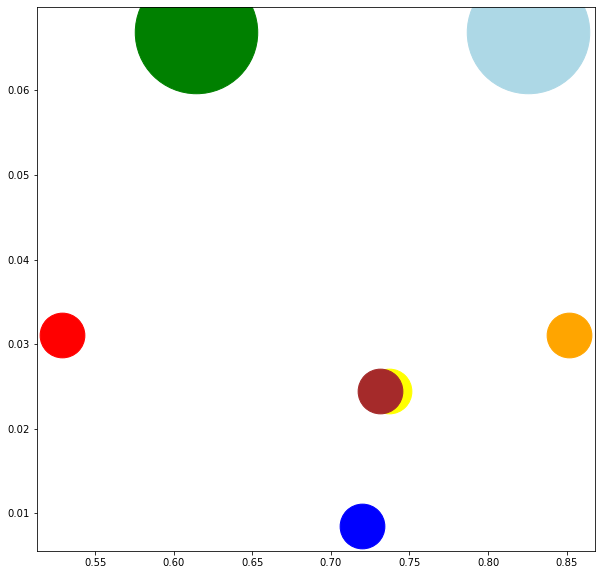

In [29]:
print(iterasyon, ". iterasyondan sonra ", len(populasyonX), " büyüklüğünde populasyon ile bulunan son sonuç")
plt.figure(figsize = (10,10))
for i in range(0, genBuyuklugu):
    plt.scatter(populasyonX[0][i], populasyonY[0][i], buyukluk[i], colors[i])    